# COVID ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os

# Importing Dataset and Cleaning

In [2]:
df=pd.read_csv('COVID-19 Coronavirus.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,TotÂ Cases//1M pop,TotÂ Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [4]:
# Changing column name
df.rename(columns={'TotÂ Cases//1M pop':'Total Cases//1M population'},inplace=True)
df.rename(columns={'TotÂ Deaths/1M pop':'Total Deaths/1M population'},inplace=True)


In [5]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases//1M population,Total Deaths/1M population,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [6]:
df.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths',
       'Total Cases//1M population', 'Total Deaths/1M population',
       'Death percentage'],
      dtype='object')

In [7]:
df.shape

(225, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     225 non-null    object 
 1   Other names                 224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE     225 non-null    object 
 3   Population                  225 non-null    int64  
 4   Continent                   225 non-null    object 
 5   Total Cases                 225 non-null    int64  
 6   Total Deaths                225 non-null    int64  
 7   Total Cases//1M population  225 non-null    int64  
 8   Total Deaths/1M population  225 non-null    int64  
 9   Death percentage            225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [9]:
df.describe()

,Population,Total Cases,Total Deaths,Total Cases//1M population,Total Deaths/1M population,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


# Exploratory Data Analysis

In [10]:
# No.of countries impacted by covid continent-wise
continents=df.groupby(['Continent']).agg({'Country':'count'})
continents

,Country
Continent,
Africa,58
Asia,49
Europe,48
Latin America and the Caribbean,48
Northern America,5
Oceania,17


Text(0, 0.5, 'No.of countries')

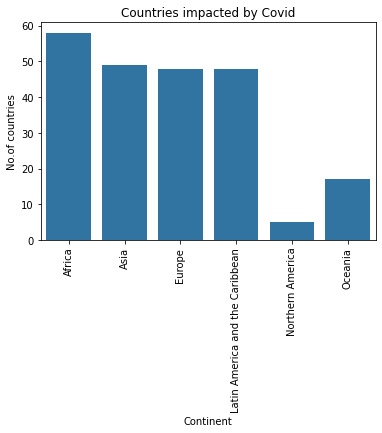

In [11]:
sns.barplot(x='Continent' ,y='Country', data=continents)
plt.xticks(rotation=90)
plt.title('Countries impacted by Covid')
plt.ylabel('No.of countries')

This means countries from North America is not much impacted by covid then others. But from this we can understand that countries from Africa is highly impacted.  

In [12]:
plot=df.groupby(['Continent']).agg({'Country':'count','Total Cases':'sum','Total Deaths':'sum'})
plot

,Country,Total Cases,Total Deaths
Continent,,,
Africa,58,11764207,252873
Asia,49,140957179,1405003
Europe,48,180332483,1775727
Latin America and the Caribbean,48,67509231,1686828
Northern America,5,85364770,1046062
Oceania,17,5647957,9336


<Axes: xlabel='Total Deaths', ylabel='Total Cases'>

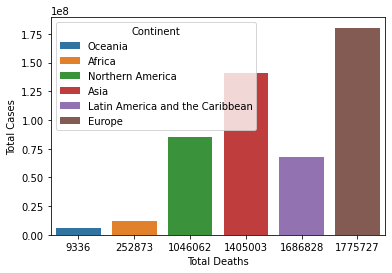

In [13]:
sns.barplot(y='Total Cases',x='Total Deaths',hue='Continent',data=plot)

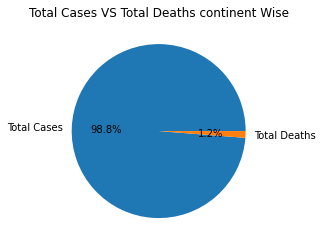

In [14]:
total=df[['Total Cases','Total Deaths']].agg({'Total Cases':'sum','Total Deaths':'sum'})
plt.pie(total, labels=total.index, autopct='%1.1f%%')
plt.title('Total Cases VS Total Deaths continent Wise')
plt.show()

Total death is very low when comparing to total cases that means Severity level is very low.

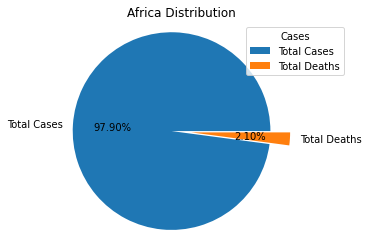

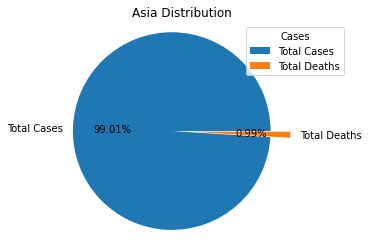

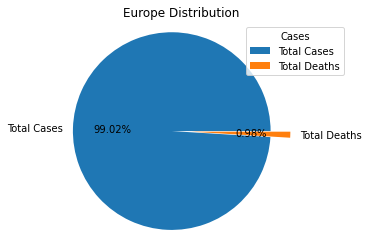

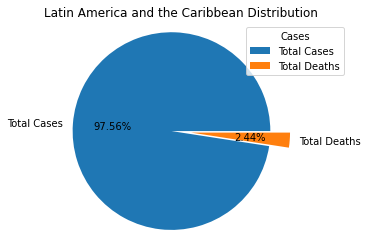

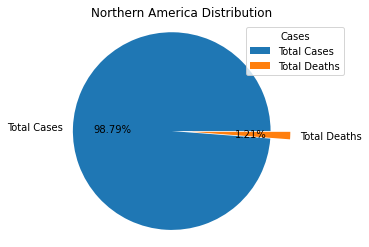

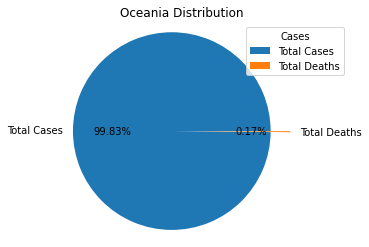

In [15]:
# comparing continent-wise total cases and total death

for i in range(0,len(plot.index)):
    plot_1=plot.iloc[i:i+1,].agg({'Total Cases':'sum','Total Deaths':'sum'})
    explode = (0, 0.2) 
    plt.pie(plot_1, explode=explode, labels=plot_1.index, autopct='%1.2f%%')
    plt.legend(title='Cases',loc='best')
    ax=list(plot.index.values)
    plt.title(f"{plot.index[i]} Distribution")
    plt.axis('equal')
    plt.show()


We can see from above charts that maximum deaths are from Latin America and the Caribbean 

Text(0.5, 1.0, 'Distribution of max cases from Countries from continents')

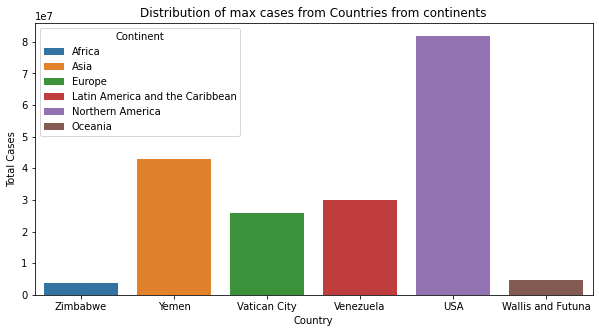

In [16]:
plot_2=df.groupby(['Continent']).agg({'Total Cases':'max','Country':'max'})
plot_2
plt.subplots(figsize=(10, 5))
sns.barplot(x='Country',y='Total Cases',data=plot_2,hue='Continent',err_kws={'linewidth': 2}
           ).set_title('Distribution of max cases from Countries from continents')

As we can say from above graph that USA from continent Africa has max. no. of Covid Cases

CONCLUSION:

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.

For more information : https://www.who.int/emergencies/diseases/novel-coronavirus-2019